<a href="https://colab.research.google.com/github/mmartigani/RoadMapIA/blob/main/67_Scikit_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#ajuste de hiperparametros

In [2]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

data = load_iris()
X = data.data
y = data.target

modelo = RandomForestClassifier(random_state=42)

In [3]:
parametros = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [4, 5, 6, 7, 8],
    'criterion': ['gini', 'entropy']
}

In [4]:
mi_grid_search = GridSearchCV(estimator=modelo,
                             param_grid=parametros,
                             cv=5,
                             scoring="accuracy")

In [5]:
mi_grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [6]:
print("Mejores parámetros:", mi_grid_search.best_params_)
print("Mejor exactitud:", mi_grid_search.best_score_)

Mejores parámetros: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 50}
Mejor exactitud: 0.9666666666666668


In [7]:
#scikit-learn

In [8]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Cargamos el dataset
data = load_iris()
X = data.data
y = data.target

# Dividimos el dataset en conjunto de entrenamiento y de prueba
X_entrena, X_prueba, y_entrena, y_prueba = train_test_split(X, y, test_size=0.25, random_state=0)

# Creamos una instancia del escalador
scaler = StandardScaler()

# Estimador (StandardScaler): Aprendemos los parámetros de escalado con fit
scaler.fit(X_entrena)

# Transformador (StandardScaler): Aplicamos la transformación a los datos de entrenamiento y prueba
X_entrena_escalado = scaler.transform(X_entrena)
X_prueba_escalado = scaler.transform(X_prueba)

# Creamos una instancia del modelo
modelo = LogisticRegression()

# Estimador (LogisticRegression): Entrenamos el modelo con los datos escalados
modelo.fit(X_entrena_escalado, y_entrena)

# Predictor (LogisticRegression): Hacemos predicciones y evaluamos el modelo
y_pred = modelo.predict(X_prueba_escalado)
puntaje = modelo.score(X_prueba_escalado, y_prueba)
print(f"Las predicciones son: {y_pred}")
print(f"La precisión del modelo es: {puntaje:.2f}")

Las predicciones son: [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
La precisión del modelo es: 0.97


In [9]:
#evaluacion de los modelos con valiacion cruzada

In [10]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

data = load_iris()
X = data.data
y = data.target

modelo = RandomForestClassifier(n_estimators=100, random_state=42)

In [11]:
puntaje = cross_val_score(modelo, X, y, cv=5)

In [12]:
print("Exactitud de cada partición:", puntaje)
print("Media de la exactitud:", puntaje.mean())

Exactitud de cada partición: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Media de la exactitud: 0.9666666666666668


In [13]:
#pipelines y automatizacion

In [14]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Cargamos el dataset
data = load_iris()
X = data.data
y = data.target

# Dividimos el dataset en conjunto de entrenamiento y de prueba
X_entrena, X_prueba, y_entrena, y_prueba = train_test_split(X, y, test_size=0.25, random_state=0)

# Creamos una instancia del escalador
scaler = StandardScaler()

# Estimador (StandardScaler): Aprendemos los parámetros de escalado con fit
scaler.fit(X_entrena)

# Transformador (StandardScaler): Aplicamos la transformación a los datos de entrenamiento y prueba
X_entrena_escalado = scaler.transform(X_entrena)
X_prueba_escalado = scaler.transform(X_prueba)

# Creamos una instancia del modelo
modelo = LogisticRegression()

# Estimador (LogisticRegression): Entrenamos el modelo con los datos escalados
modelo.fit(X_entrena_escalado, y_entrena)

# Predictor (LogisticRegression): Hacemos predicciones y evaluamos el modelo
y_pred = modelo.predict(X_prueba_escalado)
puntaje = modelo.score(X_prueba_escalado, y_prueba)
print(f"Las predicciones son: {y_pred}")
print(f"La precisión del modelo es: {puntaje:.2f}")

Las predicciones son: [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
La precisión del modelo es: 0.97


In [15]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Cargamos el dataset
data = load_iris()
X = data.data
y = data.target

# Dividimos el dataset en conjunto de entrenamiento y de prueba
X_entrena, X_prueba, y_entrena, y_prueba = train_test_split(X, y, test_size=0.25, random_state=0)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('modelo', LogisticRegression())
])

pipeline.fit(X_entrena, y_entrena)

# Predictor (LogisticRegression): Hacemos predicciones y evaluamos el modelo
y_pred = pipeline.predict(X_prueba)
puntaje = pipeline.score(X_prueba, y_prueba)

print(f"Las predicciones son: {y_pred}")
print(f"La precisión del modelo es: {puntaje:.2f}")

Las predicciones son: [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
La precisión del modelo es: 0.97


In [16]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

# Cargamos el dataset
data = load_iris()
X = data.data
y = data.target

# Dividimos el dataset en conjunto de entrenamiento y de prueba
X_entrena, X_prueba, y_entrena, y_prueba = train_test_split(X, y, test_size=0.25, random_state=0)

pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression())

pipeline.fit(X_entrena, y_entrena)

# Predictor (LogisticRegression): Hacemos predicciones y evaluamos el modelo
y_pred = pipeline.predict(X_prueba)
puntaje = pipeline.score(X_prueba, y_prueba)

print(f"Las predicciones son: {y_pred}")
print(f"La precisión del modelo es: {puntaje:.2f}")

Las predicciones son: [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
La precisión del modelo es: 0.97


In [17]:
#preprocesamiento de datos

In [18]:
import numpy as np
from sklearn.datasets import load_iris

# Llamamos a `preprocessing` solo una vez, para importar los 3 recursos de preprocesamiento
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder

In [19]:
data = np.array([[1, -1, 2],
                [2, 0, 0],
                [0, 1, -1]])
data

array([[ 1, -1,  2],
       [ 2,  0,  0],
       [ 0,  1, -1]])

In [20]:
scaler = MinMaxScaler(feature_range=(0, 1))
data_escalada = scaler.fit_transform(data)
data_escalada

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

In [21]:
iris = load_iris()
X = iris.data

In [22]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [23]:
X_escalado = scaler.fit_transform(X)

In [24]:
print("Datos Originales")
print(X[:5])
print("\nDatos Escalados")
print(X_escalado[:5])

Datos Originales
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Datos Escalados
[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]]


In [25]:
#standarScaler

In [26]:
scaler2 = StandardScaler()
data_escalada2 = scaler2.fit_transform(data)
data_escalada2

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [27]:
np.std(data_escalada2)

np.float64(1.0)

In [28]:
#onehotencoder

In [29]:
categorias = np.array([["rojo"], ["verde"], ["azul"], ["verde"], ["verde"], ["azul"]])
categorias

array([['rojo'],
       ['verde'],
       ['azul'],
       ['verde'],
       ['verde'],
       ['azul']], dtype='<U5')

In [30]:
encoder = OneHotEncoder(sparse_output=False)
data_codificada = encoder.fit_transform(categorias)
data_codificada

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [31]:
import matplotlib.pyplot as plt
from skimage import data, io

/tmp/ipython-input-32-1191198302.py:5: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(imagen);


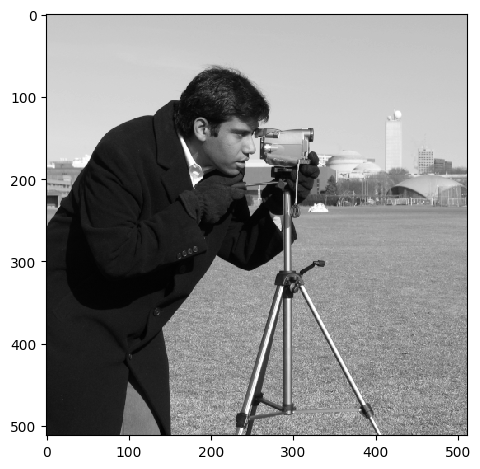

In [32]:
# Cargar una imagen de muestra
imagen = data.camera()

# Mostrar la imagen
io.imshow(imagen);

/tmp/ipython-input-33-2926445625.py:5: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(imagen);


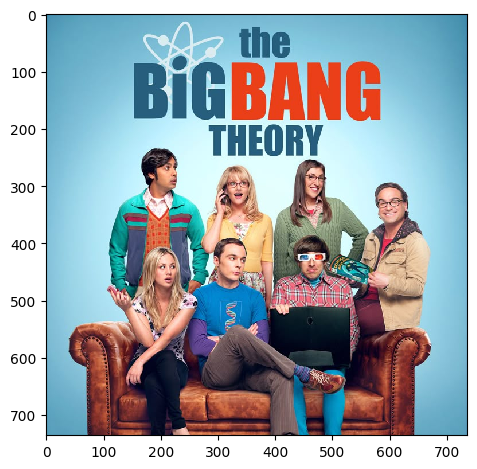

In [33]:
# Cargar una imagen desde una ruta local
imagen = io.imread('/content/c388f5d35819f5c8f16d3c0939079ac0.jpg')

# Mostrar la imagen
io.imshow(imagen);

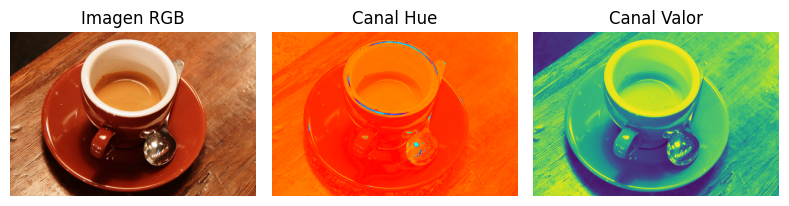

In [34]:
from skimage import data
from skimage.color import rgb2hsv

rgb_img = data.coffee()
hsv_img = rgb2hsv(rgb_img)
hue_img = hsv_img[:, :, 0]
value_img = hsv_img[:, :, 2]

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(8, 2))

ax0.imshow(rgb_img)
ax0.set_title("Imagen RGB")
ax0.axis('off')
ax1.imshow(hue_img, cmap='hsv')
ax1.set_title("Canal Hue")
ax1.axis('off')
ax2.imshow(value_img)
ax2.set_title("Canal Valor")
ax2.axis('off')

fig.tight_layout()

In [37]:
from skspatial.objects import Point
from skspatial.plotting import plot_2d, plot_3d

In [39]:
#!pip install scikit-spatial

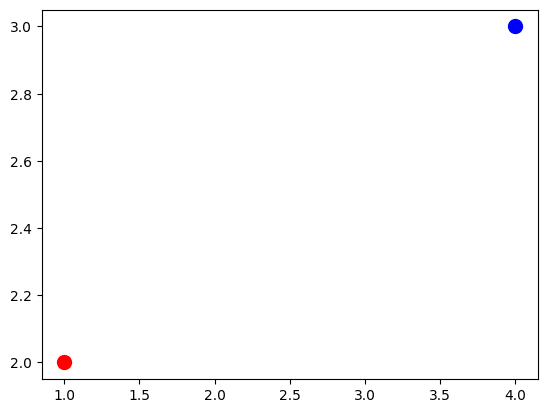

In [38]:
punto1 = Point([1, 2])
punto2 = Point([4, 3])

plot_2d(
    punto1.plotter(c='r', s=100, label='Punto 1'),
    punto2.plotter(c='b', s=100, label='Punto 2')
);

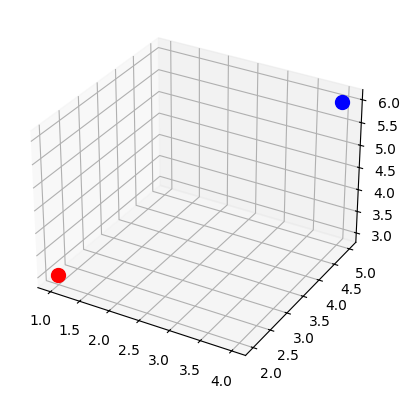

In [40]:
punto1 = Point([1, 2, 3])
punto2 = Point([4, 5, 6])

plot_3d(
    punto1.plotter(c='r', s=100, label='Punto 1'),
    punto2.plotter(c='b', s=100, label='Punto 2')
);

In [45]:
import numpy as np
import pandas as pd
from sktime.utils.plotting import plot_series

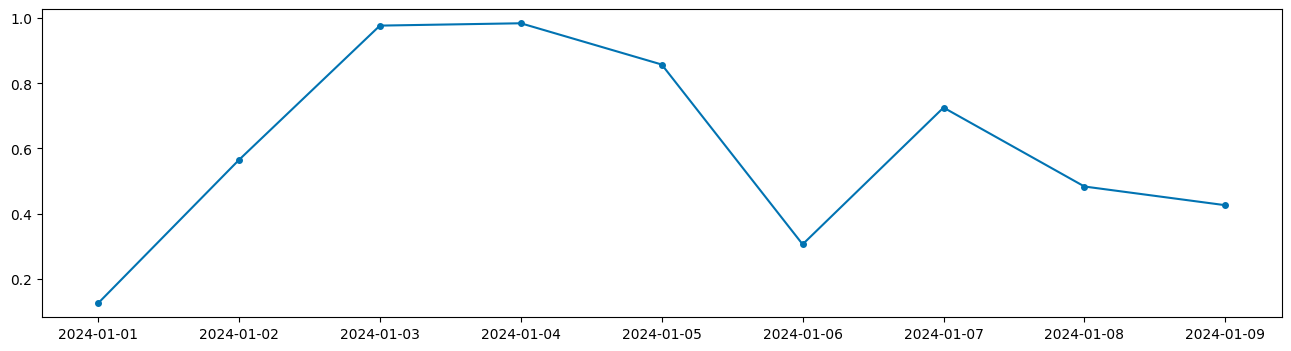

In [46]:
# Generar datos de serie temporal
tiempos = pd.date_range(start='2024-01-01', periods=9, freq='D')
valores = np.random.rand(9)  # 9 valores aleatorios

# Crear un DataFrame pandas y convertirlo en una serie de sktime
serie_temporal = pd.Series(valores, index=tiempos)

# Visualizar la serie temporal
plot_series(serie_temporal);

In [47]:
#seleccion y division de datos

In [48]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, SelectFromModel, chi2
from sklearn.ensemble import RandomForestClassifier

In [49]:
data = load_iris()
X = data.data
y = data.target

In [50]:
X_entrena, X_prueba, y_entrena, y_prueba = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
print("Tamaño del conjunto total:", len(X))
print("Tamaño del conjunto entrenamiento:", len(X_entrena))
print("Tamaño del conjunto pruebas:", len(X_prueba))

Tamaño del conjunto total: 150
Tamaño del conjunto entrenamiento: 120
Tamaño del conjunto pruebas: 30


In [52]:
selector = SelectKBest(chi2, k=3)
X_nuevo = selector.fit_transform(X_entrena, y_entrena)

In [53]:
print("Primeras 5 filas del conjunto de entrenamiento")
print(X_entrena[:5])
print("\nPrimeras 5 filas del conjunto de columnas seleccionadas")
print(X_nuevo[:5])

Primeras 5 filas del conjunto de entrenamiento
[[4.6 3.6 1.  0.2]
 [5.7 4.4 1.5 0.4]
 [6.7 3.1 4.4 1.4]
 [4.8 3.4 1.6 0.2]
 [4.4 3.2 1.3 0.2]]

Primeras 5 filas del conjunto de columnas seleccionadas
[[4.6 1.  0.2]
 [5.7 1.5 0.4]
 [6.7 4.4 1.4]
 [4.8 1.6 0.2]
 [4.4 1.3 0.2]]


In [54]:
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
selector2 = SelectFromModel(modelo)
X_importante = selector2.fit_transform(X_entrena, y_entrena)

In [55]:
print("Primeras 5 filas del conjunto de entrenamiento")
print(X_entrena[:5])
print("\nPrimeras 5 filas del conjunto de columnas seleccionadas")
print(X_importante[:5])

Primeras 5 filas del conjunto de entrenamiento
[[4.6 3.6 1.  0.2]
 [5.7 4.4 1.5 0.4]
 [6.7 3.1 4.4 1.4]
 [4.8 3.4 1.6 0.2]
 [4.4 3.2 1.3 0.2]]

Primeras 5 filas del conjunto de columnas seleccionadas
[[1.  0.2]
 [1.5 0.4]
 [4.4 1.4]
 [1.6 0.2]
 [1.3 0.2]]


In [56]:
#optimizacion

In [57]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Cargar el dataset de diabetes
diabetes = datasets.load_diabetes()

# Convertir a DataFrame para facilitar el análisis exploratorio
diabetes_df = pd.DataFrame(data=np.c_[diabetes['data'], diabetes['target']],
                           columns=diabetes['feature_names'] + ['target'])

# Convertir 'target' en categorías para clasificación
diabetes_df['target'] = (diabetes_df['target'] > diabetes_df['target'].median()).astype(int)

# División de datos en conjuntos de entrenamiento y prueba
X = diabetes_df.drop('target', axis=1)
y = diabetes_df['target']
X_entrena, X_prueba, y_entrena, y_prueba = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo RandomForest
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_entrena, y_entrena)

# Realizar predicciones con el conjunto de prueba
predicciones = modelo.predict(X_prueba)

# Evaluación del modelo
puntaje = modelo.score(X_prueba, y_prueba)
print(f"\nPrecisión del modelo: {puntaje:.2f}")



Precisión del modelo: 0.72


In [58]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline

# Cargar el dataset de diabetes
diabetes = datasets.load_diabetes()

# Convertir a DataFrame para un análisis exploratorio más fácil
diabetes_df = pd.DataFrame(data=np.c_[diabetes['data'], diabetes['target']],
                           columns=diabetes['feature_names'] + ['target'])

# Convertir la variable 'target' en categórica para clasificación
diabetes_df['target'] = (diabetes_df['target'] > diabetes_df['target'].median()).astype(int)

# División de datos en conjuntos de entrenamiento y prueba
X = diabetes_df.drop('target', axis=1)
y = diabetes_df['target']
X_entrena, X_prueba, y_entrena, y_prueba = train_test_split(X, y, test_size=0.2, random_state=42)

# Selección de las mejores 4 características
selector = SelectKBest(score_func=f_classif, k=4)
X_entrena_seleccionada = selector.fit_transform(X_entrena, y_entrena)
X_prueba_seleccionada = selector.transform(X_prueba)

# Creación del pipeline sin la selección de características
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Entrenamiento del modelo usando el pipeline
pipeline.fit(X_entrena_seleccionada, y_entrena)

# Realización de predicciones con el conjunto de prueba
predicciones = pipeline.predict(X_prueba_seleccionada)

# Evaluación del modelo
puntaje = pipeline.score(X_prueba_seleccionada, y_prueba)
print(f"Precisión del modelo: {puntaje:.2f}")

# Evaluación adicional con validación cruzada
puntajes_validacion_cruzada = cross_val_score(pipeline, selector.transform(X), y, cv=5)
print(f"Puntuaciones de validación cruzada: {puntajes_validacion_cruzada}")
print(f"Promedio de puntuación de validación cruzada: {np.mean(puntajes_validacion_cruzada):.2f}")


Precisión del modelo: 0.74
Puntuaciones de validación cruzada: [0.69662921 0.74157303 0.67045455 0.61363636 0.68181818]
Promedio de puntuación de validación cruzada: 0.68
